# Principal Component Analysis

### Step-by-Step Explanation of PCA:

#### 1. Standardization:
Before applying PCA, it is common practice to standardize the data by subtracting the mean and dividing by the standard deviation. This ensures that all variables are on the same scale.

standardize the data:

$$ X_{\text{std}} = \frac{{X - \bar{X}}}{{\sigma}} $$

where $X_{\text{std}}$ is the standardized data, $X$ is the original data, $\bar{X}$ is the mean, and $\sigma$ is the standard deviation.

#### 2. Covariance Matrix:
PCA relies on the covariance matrix, which measures the degree of joint variability between two variables. The covariance matrix is calculated for the standardized data.

Calculate the covariance matrix ($S$) for the standardized data:

$$ S = \frac{1}{n-1} \sum_{i=1}^{n} (X_{\text{std}}^T \cdot X_{\text{std}}) $$

where $n$ is the number of samples.

#### 3. Eigenvalue Decomposition:
The next step is to find the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors represent the directions of maximum variance in the data, while eigenvalues indicate the magnitude of variance along those directions.

Find the eigenvalues ($\lambda$) and eigenvectors ($V$) of the covariance matrix:

$$ S \cdot V = \lambda \cdot V $$

#### 4. Sort Eigenvalues:

Sort the eigenvalues in descending order and arrange the corresponding eigenvectors accordingly.

#### 5. Select Principal Components:

Choose the top $k$ eigenvectors corresponding to the highest eigenvalues to form the matrix $W$.

#### 6. Projection:
The selected principal components are used to project the original data onto a new subspace. Each data point is now represented as a linear combination of the chosen principal components.

$$ X_{\text{pca}} = X_{\text{std}} \cdot W $$

where $X_{\text{pca}}$ is the data in the new subspace.

### PCA Applications:

#### 1. Dimensionality Reduction:

Select the first $k$ columns of $X_{\text{pca}}$ to reduce dimensionality.

#### 2. Noise Reduction:

Use the principal components with the highest eigenvalues to retain essential features and reduce noise.

#### 3. Data Visualization:

Visualize high-dimensional data in a lower-dimensional space using the selected principal components.

#### 4. Feature Engineering:

Apply PCA as a preprocessing step to improve model performance by reducing the dimensionality of input features.

Keep in mind the assumptions and limitations of PCA, such as its reliance on linear relationships between variables and potential challenges in interpreting high-dimensional principal components.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path = '/content/drive/MyDrive/ML_LECTURES/images/00/butterfly.jpg'

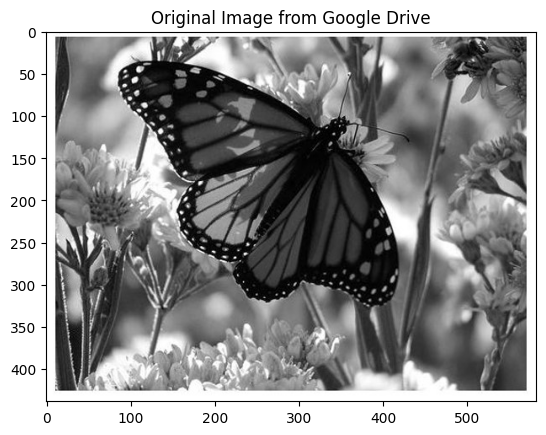

In [ ]:
from PIL import Image

# Load the image using PIL
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.title('Original Image from Google Drive')
plt.show()

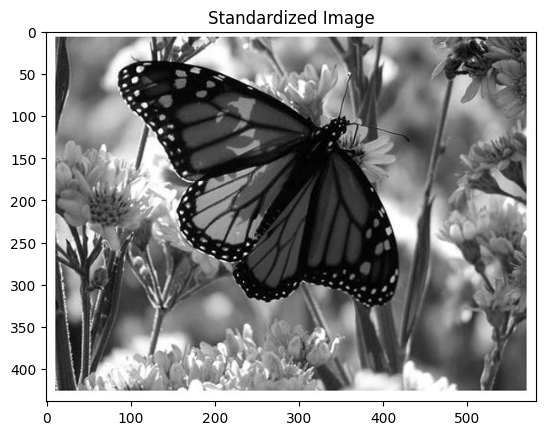

In [ ]:
# Step 1: Standardization

# Convert the image to grayscale and convert to NumPy array
image_gray = np.array(image.convert('L'))

# Step 1: Standardization
mean_value = np.mean(image_gray)
std_dev = np.std(image_gray)
image_std = (image_gray - mean_value) / std_dev

# Visualize the standardized image
plt.imshow(image_std, cmap='gray')
plt.title('Standardized Image')
plt.show()

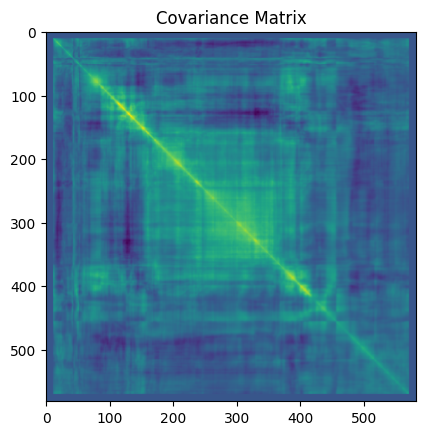

In [ ]:
# Step 2: Covariance Matrix
cov_matrix = np.cov(image_std, rowvar=False)

# Visualize the Covariance Matrix
plt.imshow(cov_matrix, cmap='viridis')
plt.title('Covariance Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


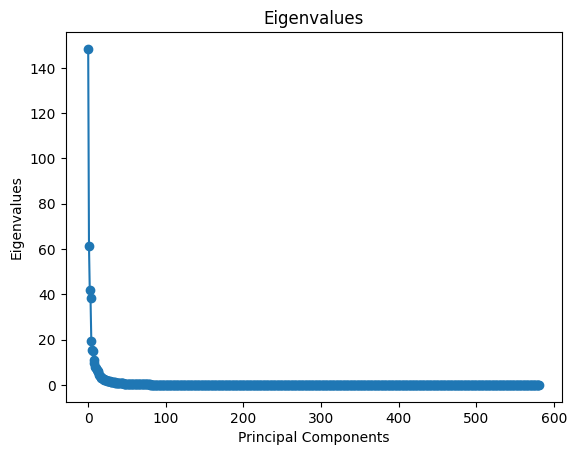

In [ ]:
# Step 3: Eigenvalue Decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Visualize the eigenvalues
plt.plot(eigenvalues, marker='o')
plt.title('Eigenvalues')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

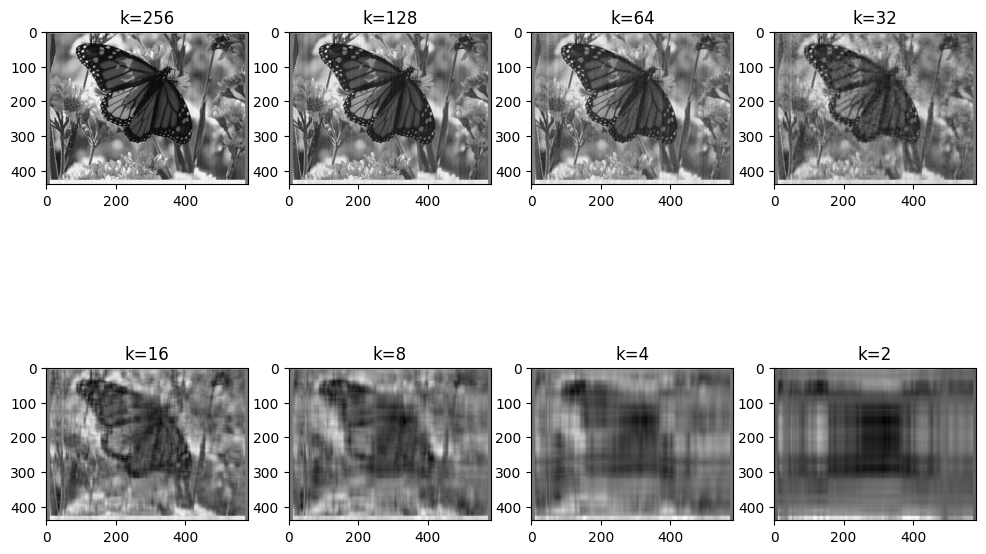

In [ ]:
# Step 5: Select Principal Components and Projection

# List of values for k (number of principal components)
k_values = [256, 128, 64, 32, 16, 8 , 4, 2]

# Visualize reconstructed images for different values of k
plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values, 1):
    # Select the top k eigenvectors
    selected_eigenvectors = eigenvectors[:, :k]

    # Project the standardized data onto the new subspace
    image_pca = np.dot(image_std, selected_eigenvectors)

    # Reconstruct the image from the PCA projection
    reconstructed_image = np.dot(image_pca, selected_eigenvectors.T)

    # Display the reconstructed image
    plt.subplot(2, len(k_values)//2, i)
    plt.imshow(np.real(reconstructed_image), cmap='gray')  # Taking the real part
    plt.title(f'k={k}')

plt.show()
